---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 3

In this assignment you will explore measures of centrality on two networks, a friendship network in Part 1, and a blog network in Part 2.

## Part 1

Answer questions 1-4 using the network `G1`, a network of friendships at a university department. Each node corresponds to a person, and an edge indicates friendship. 

*The network has been loaded as networkx graph object `G1`.*

In [12]:
import networkx as nx

G1 = nx.read_gml('friendships.gml')

## Data visualization

In [75]:
!head -15 friendships.gml 

graph [
  node [
    id 0
    label 1
  ]
  node [
    id 1
    label 2
  ]
  node [
    id 2
    label 3
  ]
  node [
    id 3


In [76]:
from networkx.algorithms import bipartite
G1.is_directed(), G1.is_multigraph(), bipartite.is_bipartite(G1)

(False, False, False)

<IPython.core.display.Javascript object>


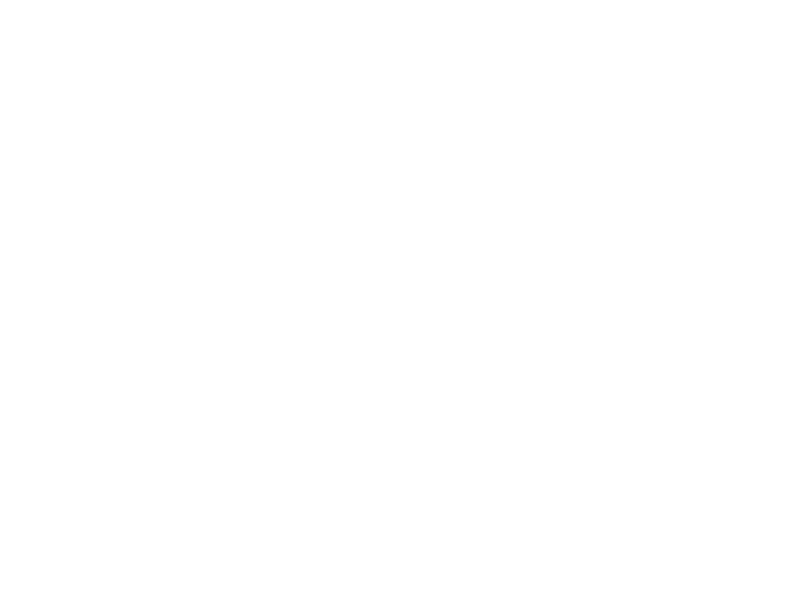

In [77]:
%matplotlib notebook
nx.draw_networkx(G1)

In [78]:
n_friends = G1.degree()
n_friends

{1: 30,
 2: 23,
 3: 38,
 4: 22,
 5: 10,
 6: 21,
 7: 26,
 8: 8,
 9: 17,
 10: 32,
 11: 20,
 12: 18,
 13: 25,
 14: 36,
 15: 19,
 16: 51,
 17: 7,
 18: 18,
 19: 28,
 20: 17,
 21: 43,
 22: 15,
 23: 52,
 24: 42,
 25: 20,
 26: 3,
 27: 21,
 28: 12,
 29: 9,
 30: 26,
 31: 22,
 32: 3,
 33: 8,
 34: 19,
 35: 1,
 36: 1,
 37: 1,
 38: 25,
 39: 28,
 40: 27,
 41: 49,
 42: 51,
 43: 10,
 44: 18,
 45: 31,
 46: 36,
 47: 7,
 48: 7,
 49: 40,
 50: 26,
 51: 22,
 52: 38,
 53: 2,
 54: 32,
 55: 15,
 56: 35,
 57: 28,
 58: 33,
 59: 19,
 60: 3,
 61: 10,
 62: 26,
 63: 10,
 64: 17,
 65: 18,
 66: 14,
 67: 14,
 68: 16,
 69: 30,
 70: 23,
 71: 13,
 72: 37,
 77: 8,
 73: 21,
 74: 21,
 75: 12,
 76: 43,
 78: 12,
 79: 12,
 82: 23,
 80: 26,
 81: 24,
 83: 6,
 84: 15,
 85: 22,
 86: 11,
 87: 6,
 88: 12,
 89: 8,
 90: 22,
 91: 12,
 92: 13,
 93: 19,
 94: 24,
 95: 5,
 96: 7,
 97: 2,
 98: 5,
 99: 5,
 100: 3,
 101: 13,
 102: 3,
 103: 6,
 104: 16,
 106: 31,
 107: 16,
 105: 72,
 128: 36,
 129: 7,
 130: 11,
 108: 7,
 109: 2,
 110: 10,
 111: 

In [79]:
len(n_friends), len(G1.edges())

(1133, 5453)

In [80]:
max_value = max(n_friends.values())
node_max_value = [i for i in n_friends.keys() if n_friends[i]==max_value]
node_max_value = node_max_value[0]
node_max_value, max_value

(105, 72)

In [81]:
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

<IPython.core.display.Javascript object>


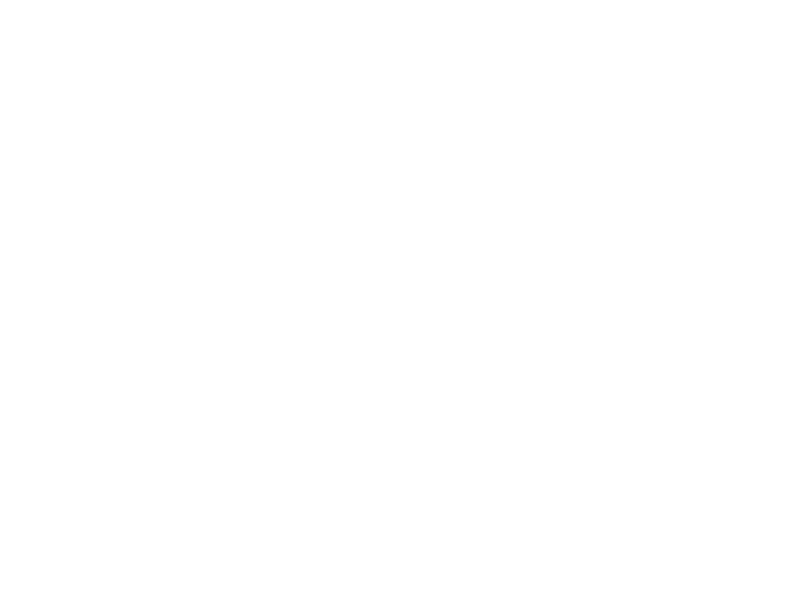

In [82]:
plot_graph(G1)

In [83]:
nx.clustering(G1, node_max_value)

0.1056338028169014

In [84]:
lst_cluster = [nx.clustering(G1, i) for i in n_friends.keys()]
lst_cluster

[0.22758620689655173,
 0.2924901185770751,
 0.19630156472261737,
 0.26406926406926406,
 0.08888888888888889,
 0.21904761904761905,
 0.13846153846153847,
 0.4642857142857143,
 0.3382352941176471,
 0.11290322580645161,
 0.21578947368421053,
 0.2875816993464052,
 0.16,
 0.08888888888888889,
 0.17543859649122806,
 0.14588235294117646,
 0.23809523809523808,
 0.33986928104575165,
 0.15873015873015872,
 0.22058823529411764,
 0.09634551495016612,
 0.47619047619047616,
 0.06485671191553545,
 0.10220673635307782,
 0.09473684210526316,
 1.0,
 0.15714285714285714,
 0.25757575757575757,
 0.16666666666666666,
 0.1476923076923077,
 0.12987012987012986,
 0.3333333333333333,
 0.5,
 0.21637426900584794,
 0.0,
 0.0,
 0.0,
 0.07666666666666666,
 0.20105820105820105,
 0.12535612535612536,
 0.07653061224489796,
 0.10352941176470588,
 0.3333333333333333,
 0.1830065359477124,
 0.08817204301075268,
 0.17142857142857143,
 0.3333333333333333,
 0.23809523809523808,
 0.14487179487179488,
 0.19692307692307692,
 0.0

In [85]:
import numpy as np
sum(lst_cluster), max(lst_cluster), np.average(lst_cluster)

(249.50058342813338, 1.0, 0.22021234194892611)

In [86]:
nx.average_clustering(G1), nx.transitivity(G1)

(0.2202123419489262, 0.1663196494608285)

<IPython.core.display.Javascript object>


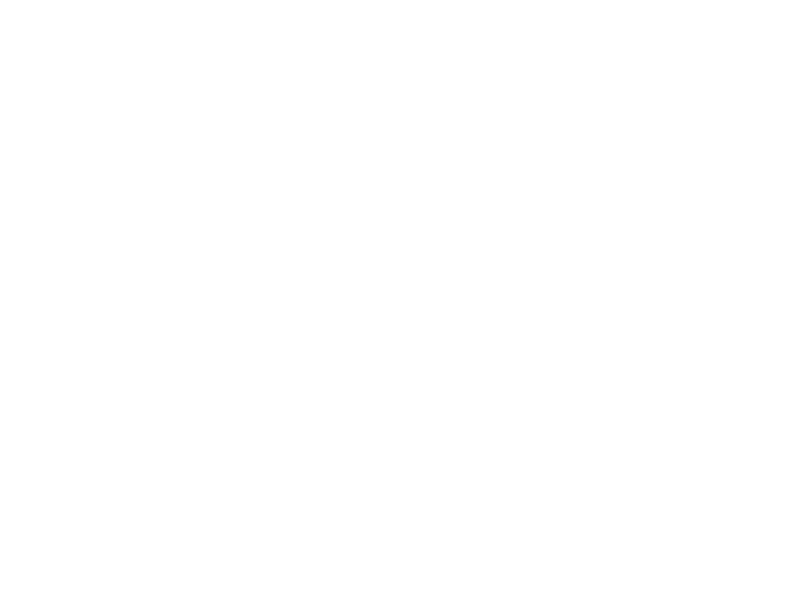

In [87]:
T = nx.bfs_tree(G1, node_max_value)
plot_graph(T)

In [88]:
T.edges()

[(105, 9),
 (105, 16),
 (105, 21),
 (105, 23),
 (105, 39),
 (105, 40),
 (105, 42),
 (105, 49),
 (105, 51),
 (105, 55),
 (105, 56),
 (105, 76),
 (105, 79),
 (105, 80),
 (105, 104),
 (105, 128),
 (105, 641),
 (105, 642),
 (105, 643),
 (105, 644),
 (105, 645),
 (105, 390),
 (105, 647),
 (105, 648),
 (105, 650),
 (105, 651),
 (105, 472),
 (105, 274),
 (105, 259),
 (105, 333),
 (105, 201),
 (105, 284),
 (105, 218),
 (105, 414),
 (105, 545),
 (105, 291),
 (105, 420),
 (105, 646),
 (105, 307),
 (105, 437),
 (105, 439),
 (105, 446),
 (105, 321),
 (105, 578),
 (105, 203),
 (105, 196),
 (105, 204),
 (105, 198),
 (105, 200),
 (105, 129),
 (105, 202),
 (105, 205),
 (105, 206),
 (105, 210),
 (105, 468),
 (105, 213),
 (105, 214),
 (105, 216),
 (105, 217),
 (105, 331),
 (105, 335),
 (105, 400),
 (105, 227),
 (105, 361),
 (105, 236),
 (105, 649),
 (105, 116),
 (105, 503),
 (105, 596),
 (105, 378),
 (105, 251),
 (105, 183),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 7),
 (9, 103),
 (9, 41),
 (9, 106),
 (9, 13),
 

In [89]:
nx.shortest_path_length(G1, 9)

{9: 0,
 1: 1,
 2: 1,
 3: 1,
 7: 1,
 103: 1,
 104: 1,
 41: 1,
 106: 1,
 13: 1,
 16: 1,
 107: 1,
 21: 1,
 22: 1,
 105: 1,
 24: 1,
 10: 1,
 30: 1,
 4: 2,
 5: 2,
 6: 2,
 8: 2,
 11: 2,
 12: 2,
 14: 2,
 15: 2,
 17: 2,
 18: 2,
 19: 2,
 20: 2,
 23: 2,
 25: 2,
 26: 2,
 27: 2,
 28: 2,
 29: 2,
 31: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 47: 2,
 48: 2,
 49: 2,
 50: 2,
 51: 2,
 52: 2,
 53: 2,
 54: 2,
 55: 2,
 56: 2,
 76: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 93: 2,
 94: 2,
 95: 2,
 96: 2,
 97: 2,
 98: 2,
 99: 2,
 100: 2,
 614: 2,
 246: 2,
 639: 2,
 640: 2,
 128: 2,
 327: 2,
 135: 2,
 333: 2,
 404: 2,
 201: 2,
 501: 2,
 218: 2,
 154: 2,
 260: 2,
 134: 2,
 270: 2,
 262: 2,
 62: 2,
 191: 2,
 194: 2,
 245: 2,
 375: 2,
 332: 2,
 334: 2,
 210: 2,
 87: 2,
 250: 2,
 353: 2,
 354: 2,
 355: 2,
 358: 2,
 235: 2,
 238: 2,
 368: 2,
 369: 2,
 370: 2,
 371: 2,
 372: 2,
 373: 2,
 374: 2,
 247: 2,
 376: 2,
 377: 2,
 378: 2,
 379: 2,


In [90]:
nx.shortest_path_length(T, 9)

{1: 1,
 2: 1,
 3: 1,
 4: 2,
 7: 1,
 8: 2,
 9: 0,
 10: 1,
 11: 2,
 12: 2,
 13: 1,
 17: 2,
 20: 2,
 22: 1,
 24: 1,
 26: 2,
 28: 2,
 29: 2,
 30: 1,
 32: 2,
 35: 2,
 36: 2,
 37: 2,
 41: 1,
 48: 2,
 53: 2,
 69: 2,
 70: 2,
 89: 2,
 90: 2,
 93: 2,
 94: 2,
 95: 2,
 96: 2,
 98: 2,
 99: 2,
 100: 2,
 103: 1,
 106: 1,
 107: 1,
 109: 2,
 110: 2,
 111: 2,
 113: 2,
 114: 2,
 115: 2,
 121: 2,
 125: 2,
 126: 2,
 153: 2,
 156: 2,
 159: 2,
 160: 2,
 167: 2,
 168: 2,
 174: 2,
 178: 2,
 225: 3,
 235: 2,
 238: 2,
 285: 2,
 287: 2,
 288: 2,
 290: 2,
 292: 2,
 294: 2,
 295: 2,
 296: 2,
 297: 2,
 310: 3,
 318: 2,
 319: 2,
 326: 2,
 334: 2,
 369: 2,
 370: 2,
 373: 2,
 374: 2,
 375: 2,
 377: 2,
 379: 2,
 415: 2,
 452: 2,
 458: 2,
 506: 3,
 508: 3,
 522: 3,
 525: 3,
 526: 3,
 530: 3,
 531: 3,
 535: 3,
 538: 2,
 605: 3,
 609: 3,
 614: 2,
 626: 3,
 627: 3,
 628: 3,
 635: 3,
 639: 2,
 652: 2,
 653: 2,
 654: 2,
 655: 2,
 657: 2,
 663: 2,
 664: 2,
 665: 2,
 667: 2,
 668: 2,
 674: 3,
 758: 3,
 759: 3,
 823: 3,
 873: 3,

In [91]:
nx.average_shortest_path_length(G1)

3.6056218987708917

Technically, Breadth-first search (BFS) by itself does not let you find the shortest path, simply because BFS is not looking for a shortest path: BFS describes a strategy for searching a graph, but it does not say that you must search for anything in particular.

We say that BFS is the algorithm to use if we want to find the shortest path in an undirected, unweighted graph. The claim for BFS is that the first time a node is discovered during the traversal, that distance from the source would give us the shortest path.

In [92]:
nx.average_shortest_path_length(T) 

0.004470759951222402

In [93]:
T.edges()

[(105, 9),
 (105, 16),
 (105, 21),
 (105, 23),
 (105, 39),
 (105, 40),
 (105, 42),
 (105, 49),
 (105, 51),
 (105, 55),
 (105, 56),
 (105, 76),
 (105, 79),
 (105, 80),
 (105, 104),
 (105, 128),
 (105, 641),
 (105, 642),
 (105, 643),
 (105, 644),
 (105, 645),
 (105, 390),
 (105, 647),
 (105, 648),
 (105, 650),
 (105, 651),
 (105, 472),
 (105, 274),
 (105, 259),
 (105, 333),
 (105, 201),
 (105, 284),
 (105, 218),
 (105, 414),
 (105, 545),
 (105, 291),
 (105, 420),
 (105, 646),
 (105, 307),
 (105, 437),
 (105, 439),
 (105, 446),
 (105, 321),
 (105, 578),
 (105, 203),
 (105, 196),
 (105, 204),
 (105, 198),
 (105, 200),
 (105, 129),
 (105, 202),
 (105, 205),
 (105, 206),
 (105, 210),
 (105, 468),
 (105, 213),
 (105, 214),
 (105, 216),
 (105, 217),
 (105, 331),
 (105, 335),
 (105, 400),
 (105, 227),
 (105, 361),
 (105, 236),
 (105, 649),
 (105, 116),
 (105, 503),
 (105, 596),
 (105, 378),
 (105, 251),
 (105, 183),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 7),
 (9, 103),
 (9, 41),
 (9, 106),
 (9, 13),
 

In [94]:
nx.diameter(G1)

8

In [95]:
eccentricity = nx.eccentricity(G1)

In [96]:
max_eccentricity = max(eccentricity.values())
node_max_eccentricity = [i for i in eccentricity.keys() if eccentricity[i]==max_eccentricity]
node_max_eccentricity, max_eccentricity
## [1 o varios que cumplen el requisito] y 8 (diametro, nx.diameter(G1)) 

([1103, 1125, 1132, 1133], 8)

## Función implementada en nx para encontrar nodos (mismas 3 lineas de código pasadas en 1 función):

In [97]:
nx.periphery(G1)

[1103, 1125, 1132, 1133]

In [98]:
nx.radius(G1)

5

In [102]:
min_eccentricity = min(eccentricity.values())
node_min_eccentricity = [i for i in eccentricity.keys() if eccentricity[i]==min_eccentricity]
node_min_eccentricity, min_eccentricity
## [1 o varios que cumplen el requisito] y radio (nx.radius(G1)) 

([1,
  2,
  3,
  6,
  7,
  10,
  11,
  13,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  27,
  31,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  48,
  49,
  50,
  51,
  52,
  54,
  55,
  56,
  57,
  58,
  62,
  65,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  76,
  79,
  82,
  80,
  81,
  86,
  87,
  92,
  94,
  101,
  104,
  106,
  107,
  105,
  128,
  116,
  117,
  120,
  124,
  133,
  134,
  135,
  131,
  137,
  132,
  140,
  143,
  145,
  147,
  150,
  155,
  157,
  182,
  183,
  185,
  187,
  188,
  196,
  201,
  204,
  206,
  210,
  213,
  228,
  227,
  230,
  233,
  234,
  235,
  237,
  238,
  239,
  240,
  243,
  241,
  256,
  259,
  245,
  246,
  248,
  251,
  254,
  255,
  262,
  267,
  268,
  269,
  270,
  275,
  279,
  284,
  271,
  303,
  305,
  308,
  314,
  315,
  316,
  332,
  333,
  334,
  335,
  338,
  339,
  340,
  341,
  346,
  351,
  353,
  355,
  354,
  356,
  358,
  362,
  364,
  367,
  368,
  369,
  371,
  372,
  373,
  376,
  377,
  378

## Función implementada en nx para encontrar nodos (mismas 3 lineas de código pasadas en 1 función):

In [103]:
nx.center(G1)

[1,
 2,
 3,
 6,
 7,
 10,
 11,
 13,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 31,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 62,
 65,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 79,
 82,
 80,
 81,
 86,
 87,
 92,
 94,
 101,
 104,
 106,
 107,
 105,
 128,
 116,
 117,
 120,
 124,
 133,
 134,
 135,
 131,
 137,
 132,
 140,
 143,
 145,
 147,
 150,
 155,
 157,
 182,
 183,
 185,
 187,
 188,
 196,
 201,
 204,
 206,
 210,
 213,
 228,
 227,
 230,
 233,
 234,
 235,
 237,
 238,
 239,
 240,
 243,
 241,
 256,
 259,
 245,
 246,
 248,
 251,
 254,
 255,
 262,
 267,
 268,
 269,
 270,
 275,
 279,
 284,
 271,
 303,
 305,
 308,
 314,
 315,
 316,
 332,
 333,
 334,
 335,
 338,
 339,
 340,
 341,
 346,
 351,
 353,
 355,
 354,
 356,
 358,
 362,
 364,
 367,
 368,
 369,
 371,
 372,
 373,
 376,
 377,
 378,
 384,
 385,
 389,
 392,
 393,
 396,
 399,
 380,
 381,
 382,
 410,
 413,
 415,
 416,
 420,
 425,
 429,
 439,
 443,
 444,
 446,
 451,
 452,
 454,
 457,


In [104]:
nx.is_connected(G1), nx.number_connected_components(G1) #claro, el grafo esta conectado, entonces solo tiene 1 componente

(True, 1)

In [105]:
nx.is_connected(T)

NetworkXNotImplemented: not implemented for directed type

## Considerar que G1 en este caso no es direccional y al realizar el bfs (breadth first search) se crea este árbol (tree) conectado entre sus nodos direccionalmente desde el nodo del input, ya que nx.bfs_tree(Graph, node)

In [106]:
sorted(nx.connected_components(G1)) 
#se trata de solo 1 componente que es el grafo total, entonces tener un sorted del grafo entregará los nodos ordenados y ya 

[{1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  

## Denuevo, el grafo G1 no es direccionado

In [107]:
nx.is_strongly_connected(G1)

NetworkXNotImplemented: not implemented for undirected type

In [108]:
nx.node_connectivity(G1), nx.edge_connectivity(G1)

(1, 1)

## De la linea de código pasada se tiene que hace falta remover 1 nodo o bien 1 enlace (1 consideración de "amistad" entre dos nodos) del grafo de red de amigos para que este se desconecte (hayan dos grupos/componentes en vez de uno)

## Entonces, se puede decir que el grafo que se está visualizando no es robusto, ya que basta con eliminar/desconectar solo 1 nodo o bien 1 enlace para que no sea conectada la red, sino que de 2 o más componentes 

In [109]:
# nx.minimum_node_cut(G1), nx.minimum_edge_cut(G1)  #too much process

In [110]:
# sorted(nx.all_simple_paths(G1, 1053, 1129)) #too much process, más relevante si el grafo fuera direccional

In [111]:
# nx.node_connectivity()  # too much process, no tiene sentido si el grafico es no direccional

## APARTE, VER NATURALEZA DE ARCHIVO UTILIZADO PARA PLOTEAR SEGÚN GEOLOCALIZACIÓN

In [112]:
%matplotlib notebook
import matplotlib.pyplot as plt
Gadd = nx.read_gpickle('major_us_cities')

In [113]:
Gadd.edges()

[('El Paso, TX', 'Albuquerque, NM'),
 ('El Paso, TX', 'Mesa, AZ'),
 ('El Paso, TX', 'Tucson, AZ'),
 ('El Paso, TX', 'Phoenix, AZ'),
 ('El Paso, TX', 'Colorado Springs, CO'),
 ('Long Beach, CA', 'Oakland, CA'),
 ('Long Beach, CA', 'Mesa, AZ'),
 ('Long Beach, CA', 'Sacramento, CA'),
 ('Long Beach, CA', 'Tucson, AZ'),
 ('Long Beach, CA', 'San Jose, CA'),
 ('Long Beach, CA', 'Fresno, CA'),
 ('Long Beach, CA', 'San Diego, CA'),
 ('Long Beach, CA', 'Phoenix, AZ'),
 ('Long Beach, CA', 'San Francisco, CA'),
 ('Long Beach, CA', 'Los Angeles, CA'),
 ('Long Beach, CA', 'Las Vegas, NV'),
 ('Dallas, TX', 'Arlington, TX'),
 ('Dallas, TX', 'Wichita, KS'),
 ('Dallas, TX', 'Oklahoma City, OK'),
 ('Dallas, TX', 'New Orleans, LA'),
 ('Dallas, TX', 'Houston, TX'),
 ('Dallas, TX', 'Kansas City, MO'),
 ('Dallas, TX', 'San Antonio, TX'),
 ('Dallas, TX', 'Memphis, TN'),
 ('Dallas, TX', 'Tulsa, OK'),
 ('Dallas, TX', 'Austin, TX'),
 ('Dallas, TX', 'Fort Worth, TX'),
 ('Oakland, CA', 'Sacramento, CA'),
 ('Oaklan

In [114]:
plt.figure(figsize=(10,7))
pos = nx.get_node_attributes(Gadd, 'location') 
sería bueno saber qué recibe el get_node_attributes como inputs en 'name'
nx.draw_networkx(Gadd, pos)

SyntaxError: invalid syntax (<ipython-input-114-7a4134146d31>, line 3)

In [ ]:
plt.figure(figsize=(10,7))
pos = nx.get_node_attributes(G1, 'location') 
sería bueno saber qué recibe el get_node_attributes como inputs en 'name'
nx.draw_networkx(G1, pos)

In [ ]:
G1.edges()[:10], Gadd.edges()[:10]

In [ ]:
nx.degree_centrality(G1)[node_max_value]

In [ ]:
# max(nx.degree_centrality(G1)), nx.degree_centrality(G1)[max(nx.degree_centrality(G1))]

In [ ]:
len(nx.degree_centrality(G1)) 
# centrality = n° of neighbors, degree_centrality => rate del n° de neighbors según el n° total de nodos

In [ ]:
[max([(nx.degree_centrality(G1)[i]) for i in nx.degree_centrality(G1)])]


In [ ]:
# [j for j in nx.degree_centrality(G1).keys() if nx.degree_centrality(G1)[j] == [max([(nx.degree_centrality(G1)[i]) for i in nx.degree_centrality(G1)])]]
#too much computation

In [115]:
nx.degree_centrality(G1)

{1: 0.026501766784452298,
 2: 0.020318021201413426,
 3: 0.03356890459363958,
 4: 0.019434628975265017,
 5: 0.0088339222614841,
 6: 0.018551236749116608,
 7: 0.022968197879858657,
 8: 0.007067137809187279,
 9: 0.015017667844522967,
 10: 0.028268551236749116,
 11: 0.0176678445229682,
 12: 0.015901060070671377,
 13: 0.022084805653710248,
 14: 0.03180212014134275,
 15: 0.01678445229681979,
 16: 0.045053003533568906,
 17: 0.006183745583038869,
 18: 0.015901060070671377,
 19: 0.024734982332155476,
 20: 0.015017667844522967,
 21: 0.037985865724381625,
 22: 0.013250883392226149,
 23: 0.045936395759717315,
 24: 0.037102473498233215,
 25: 0.0176678445229682,
 26: 0.0026501766784452294,
 27: 0.018551236749116608,
 28: 0.010600706713780918,
 29: 0.007950530035335688,
 30: 0.022968197879858657,
 31: 0.019434628975265017,
 32: 0.0026501766784452294,
 33: 0.007067137809187279,
 34: 0.01678445229681979,
 35: 0.0008833922261484099,
 36: 0.0008833922261484099,
 37: 0.0008833922261484099,
 38: 0.02208480

In [116]:
nx.closeness_centrality(G1, normalized=True)

{1: 0.3497065183812172,
 2: 0.32707310026004044,
 3: 0.3666990605766116,
 4: 0.3266955266955267,
 5: 0.31549609810479373,
 6: 0.3296447291788002,
 7: 0.33650416171224734,
 8: 0.2899590163934426,
 9: 0.3370050610300685,
 10: 0.32830626450116007,
 11: 0.3368045224635525,
 12: 0.30954334153677876,
 13: 0.347239263803681,
 14: 0.3218652260449247,
 15: 0.3322571176988553,
 16: 0.3466013472137171,
 17: 0.27957520375401335,
 18: 0.32519390979603563,
 19: 0.3416842740718382,
 20: 0.33022170361726955,
 21: 0.3578880809358204,
 22: 0.3122758620689655,
 23: 0.3847722637661455,
 24: 0.3362043362043362,
 25: 0.335109532267614,
 26: 0.27270537219947,
 27: 0.32095265097816844,
 28: 0.31383421125589134,
 29: 0.3039742212674543,
 30: 0.31797752808988766,
 31: 0.34261501210653755,
 32: 0.2707486247309256,
 33: 0.29258206254846214,
 34: 0.31842475386779184,
 35: 0.2465156794425087,
 36: 0.2465156794425087,
 37: 0.2465156794425087,
 38: 0.3348121857438628,
 39: 0.3642213642213642,
 40: 0.35242839352428396

In [117]:
sum(nx.shortest_path_length(G1, 9).values())

3359

In [118]:
import operator
btwnCent = nx.betweenness_centrality(G1, normalized=True, endpoints=False)
btwnCent 
#para cada nodo indica todos los caminos por los cuales el nodo es incluido
#divido por todos los caminos posibles y normalizado por el número de 
#pares de nodos totales. Contando: (N-1)(N-2)/2 en este caso que el grafo es
#no direccional

{1: 0.008347578685386589,
 2: 0.007503785346774875,
 3: 0.0101514026798854,
 4: 0.0050294409183107465,
 5: 0.001346180522735761,
 6: 0.003147456073679586,
 7: 0.012556151835188782,
 8: 0.0006020993629138868,
 9: 0.003460609440289673,
 10: 0.010679791390857504,
 11: 0.004113677256659931,
 12: 0.002678056321122134,
 13: 0.014122024388285501,
 14: 0.012615160389517434,
 15: 0.004886780810982728,
 16: 0.0177947935785029,
 17: 0.0007754793017907504,
 18: 0.0025931598881134255,
 19: 0.006814508616129918,
 20: 0.002641176232495151,
 21: 0.019378209543006893,
 22: 0.000766803010683653,
 23: 0.03488420303387586,
 24: 0.017203485204002528,
 25: 0.007418519996459773,
 26: 0.0,
 27: 0.004353161423275418,
 28: 0.0014655244003731521,
 29: 0.0017808424004639905,
 30: 0.008839964261124263,
 31: 0.003952691411316896,
 32: 0.00023387263868696848,
 33: 0.0002167980635900296,
 34: 0.004030441579835761,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.009601694132429376,
 39: 0.0070693662832015565,
 40: 0.007798616324

In [119]:
sorted(btwnCent.items(), key=operator.itemgetter(1), reverse=True)[0:5]
#key operator define cual de los dos valores por elemento de la lista
#serán sorteados, en este caso el operator.itemgetter(1) permite tomar el 
#primer item de valor y no el key del diccionario, cosa que sí ocurriría
#de no dejar el key operator, utilizandolo como default

[(333, 0.03939111019601939),
 (105, 0.038313212007062086),
 (23, 0.03488420303387586),
 (578, 0.031546454811677095),
 (76, 0.030076678726710392)]

In [120]:
btwnCent_approx = nx.betweenness_centrality(G1, normalized=True, 
                                           endpoints=False, k=10)
btwnCent_approx

{1: 0.003960741559023298,
 2: 0.004218099209718794,
 3: 0.0019409041456009777,
 4: 0.001984416743954115,
 5: 0.00028051953006611786,
 6: 0.0015866308628817028,
 7: 0.011020267385934259,
 8: 0.00015085125538719668,
 9: 0.0010796662349770272,
 10: 0.020613641608600634,
 11: 0.002127538241599277,
 12: 0.003908331680854051,
 13: 0.00635941171202088,
 14: 0.006003689993663471,
 15: 0.004040681361603896,
 16: 0.0050086647850654436,
 17: 0.00023082631025497926,
 18: 0.0010524387733918973,
 19: 0.00875441336499237,
 20: 0.000997719706989895,
 21: 0.007400600451254732,
 22: 0.00022136794503566708,
 23: 0.017258493782771066,
 24: 0.02326994672188993,
 25: 0.0031040544145839954,
 26: 0.0,
 27: 0.0011964087386741348,
 28: 0.00047328009192710506,
 29: 0.0007831441701048463,
 30: 0.00403355771999127,
 31: 0.0009539335738283648,
 32: 0.0,
 33: 7.182728817365565e-05,
 34: 0.001914450575855615,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.009907854628034195,
 39: 0.003622758644480156,
 40: 0.003017941470530321

In [121]:
sorted(btwnCent_approx.items(), key=operator.itemgetter(1), reverse=True)[0:5]

[(378, 0.14067038173982202),
 (489, 0.08964678478330419),
 (355, 0.060705283482113626),
 (454, 0.055912252917822994),
 (290, 0.055705218160412934)]

In [122]:
btwnCentsubset = nx.betweenness_centrality_subset(G1, [1,2,3,4,5], [112,551,556], 
                                 normalized=True)
bipartite.is_bipartite(btwnCentsubset)

AttributeError: 'dict' object has no attribute 'is_directed'

In [ ]:
btwnCent_edge = nx.edge_betweenness_centrality(G1, normalized=True)

In [ ]:
sorted(btwnCent_edge.items(), key=operator.itemgetter(1), reverse=True)[0:5]

In [ ]:
sorted(nx.pagerank(G1).items(), key=operator.itemgetter(1), reverse=True)[0:5]
# typically we use alpha =0.8 - 0.9

## En este caso que el grafo no es direccional, el valor alfa del pagerank no tiene relevancia

In [ ]:
sorted(nx.pagerank(G1, alpha=0.8).items(), key=operator.itemgetter(1), reverse=True)[0:5]

In [ ]:
nx.degree_centrality(Gadd)

<IPython.core.display.Javascript object>


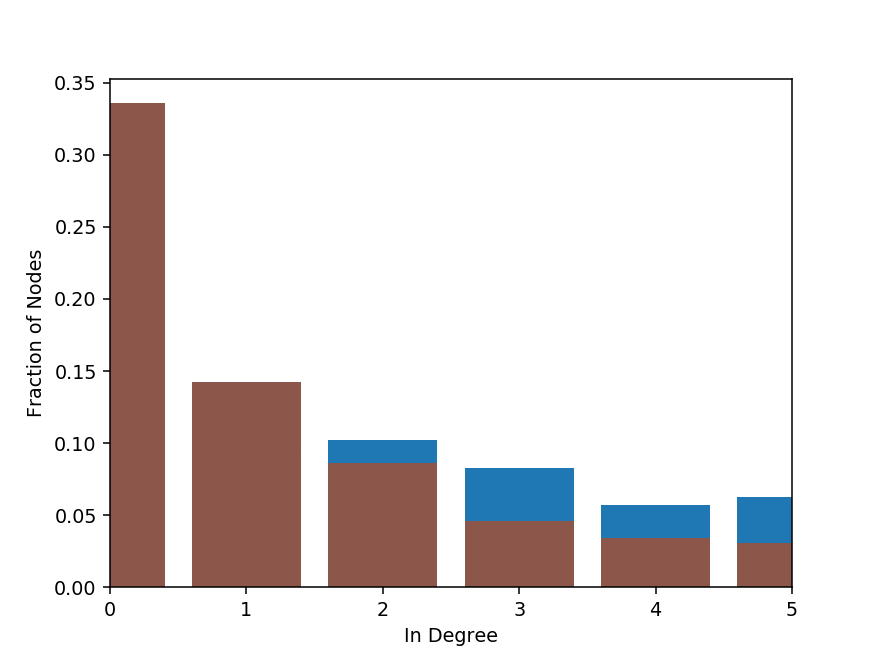

In [163]:
degrees = G1.degree()
degrees_values = sorted(set(degrees.values())) #xlabel, conteo de grados
hist = [list(degrees.values()).count(i)/ # N° de veces que se tiene un grado u otro
        float(nx.number_of_nodes(G1)) for i in degrees_values]
import matplotlib.pyplot as plt
plt.bar(degree_values, hist)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

In [159]:
list(degrees.values()).count(2)

116

In [183]:
G2 = nx.read_gml('blogs.gml')
in_degrees = G2.in_degree() 
in_degrees_values = sorted(set(in_degrees.values()))#in_degrees de entrar, los edges que
#ingresan al nodo específico
hist= [list(in_degrees.values()).count(i)/float(nx.number_of_nodes(G2)) 
       for i in in_degrees_values]
plt.bar(in_degrees_values, hist)
plt.xlabel('In Degree')
plt.ylabel('Fraction of Nodes')
plt.xlim(left=0, right=5)
plt.show()

In [172]:
degrees_values.count(1), in_degrees_values.count(1)

(1, 1)

In [184]:
in_degrees_values

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 86,
 87,
 90,
 94,
 95,
 96,
 100,
 101,
 103,
 104,
 105,
 107,
 109,
 112,
 113,
 114,
 117,
 118,
 119,
 121,
 123,
 128,
 135,
 138,
 140,
 143,
 157,
 165,
 181,
 187,
 200,
 201,
 211,
 220,
 238,
 263,
 268,
 276,
 337]

In [2]:
common_neigh = [(e[0], e[1], 
                 len(list(nx.common_neighbors(G1, e[0], e[1])))) 
                for e in nx.non_edges(G1)]

#función non_edges: señala los nodos que no estan 
#conectados entre sí por medio de un edge (pero que si estarían conectadas
# por pertenecer al mismo conjunto)

In [3]:
common_neigh

[(1, 32, 2),
 (1, 33, 5),
 (1, 34, 11),
 (1, 35, 1),
 (1, 36, 1),
 (1, 37, 1),
 (1, 38, 6),
 (1, 39, 5),
 (1, 40, 2),
 (1, 41, 5),
 (1, 42, 2),
 (1, 43, 3),
 (1, 44, 2),
 (1, 45, 5),
 (1, 46, 4),
 (1, 47, 2),
 (1, 48, 1),
 (1, 49, 2),
 (1, 50, 4),
 (1, 51, 1),
 (1, 52, 1),
 (1, 53, 1),
 (1, 54, 4),
 (1, 55, 2),
 (1, 56, 2),
 (1, 57, 1),
 (1, 58, 2),
 (1, 59, 2),
 (1, 60, 2),
 (1, 61, 1),
 (1, 62, 2),
 (1, 63, 1),
 (1, 64, 1),
 (1, 65, 1),
 (1, 66, 1),
 (1, 67, 1),
 (1, 68, 1),
 (1, 69, 2),
 (1, 70, 5),
 (1, 71, 1),
 (1, 72, 1),
 (1, 73, 2),
 (1, 74, 1),
 (1, 75, 1),
 (1, 76, 4),
 (1, 77, 2),
 (1, 78, 1),
 (1, 79, 1),
 (1, 80, 3),
 (1, 81, 2),
 (1, 82, 2),
 (1, 83, 1),
 (1, 84, 2),
 (1, 85, 1),
 (1, 86, 3),
 (1, 87, 1),
 (1, 88, 1),
 (1, 89, 1),
 (1, 90, 1),
 (1, 91, 2),
 (1, 92, 1),
 (1, 93, 2),
 (1, 94, 1),
 (1, 95, 2),
 (1, 96, 1),
 (1, 97, 2),
 (1, 98, 1),
 (1, 99, 1),
 (1, 100, 1),
 (1, 101, 1),
 (1, 102, 1),
 (1, 103, 2),
 (1, 104, 3),
 (1, 105, 4),
 (1, 106, 3),
 (1, 107, 3),
 (1

In [10]:
import operator
sorted(common_neigh, key=operator.itemgetter(2), reverse=True)

[(14, 120, 18),
 (16, 116, 14),
 (116, 196, 14),
 (196, 206, 14),
 (56, 204, 13),
 (105, 194, 13),
 (49, 196, 12),
 (120, 121, 12),
 (152, 354, 12),
 (201, 204, 12),
 (201, 214, 12),
 (204, 212, 12),
 (1, 34, 11),
 (3, 105, 11),
 (16, 289, 11),
 (23, 41, 11),
 (56, 116, 11),
 (56, 274, 11),
 (69, 282, 11),
 (143, 552, 11),
 (185, 341, 11),
 (193, 198, 11),
 (196, 216, 11),
 (206, 274, 11),
 (371, 573, 11),
 (396, 726, 11),
 (410, 552, 11),
 (4, 282, 10),
 (16, 274, 10),
 (16, 390, 10),
 (16, 446, 10),
 (41, 42, 10),
 (49, 194, 10),
 (54, 105, 10),
 (70, 120, 10),
 (84, 142, 10),
 (105, 207, 10),
 (105, 293, 10),
 (105, 322, 10),
 (128, 214, 10),
 (140, 185, 10),
 (150, 185, 10),
 (193, 205, 10),
 (196, 198, 10),
 (196, 205, 10),
 (198, 216, 10),
 (201, 439, 10),
 (204, 206, 10),
 (204, 215, 10),
 (204, 439, 10),
 (210, 390, 10),
 (212, 289, 10),
 (219, 594, 10),
 (289, 390, 10),
 (341, 381, 10),
 (396, 590, 10),
 (12, 573, 9),
 (14, 121, 9),
 (16, 128, 9),
 (16, 361, 9),
 (16, 698, 9),

In [9]:
sorted(common_neigh, key=operator.itemgetter(1), reverse=True)

[(1, 1133, 0),
 (2, 1133, 0),
 (3, 1133, 0),
 (4, 1133, 0),
 (5, 1133, 0),
 (6, 1133, 0),
 (7, 1133, 0),
 (8, 1133, 0),
 (9, 1133, 0),
 (10, 1133, 0),
 (11, 1133, 0),
 (12, 1133, 0),
 (13, 1133, 0),
 (14, 1133, 0),
 (15, 1133, 0),
 (16, 1133, 0),
 (17, 1133, 0),
 (18, 1133, 0),
 (19, 1133, 0),
 (20, 1133, 0),
 (21, 1133, 0),
 (22, 1133, 0),
 (23, 1133, 0),
 (24, 1133, 0),
 (25, 1133, 0),
 (26, 1133, 0),
 (27, 1133, 0),
 (28, 1133, 0),
 (29, 1133, 0),
 (30, 1133, 0),
 (31, 1133, 0),
 (32, 1133, 0),
 (33, 1133, 0),
 (34, 1133, 0),
 (35, 1133, 0),
 (36, 1133, 0),
 (37, 1133, 0),
 (38, 1133, 0),
 (39, 1133, 0),
 (40, 1133, 0),
 (41, 1133, 0),
 (42, 1133, 0),
 (43, 1133, 0),
 (44, 1133, 0),
 (45, 1133, 0),
 (46, 1133, 0),
 (47, 1133, 0),
 (48, 1133, 0),
 (49, 1133, 0),
 (50, 1133, 0),
 (51, 1133, 0),
 (52, 1133, 0),
 (53, 1133, 0),
 (54, 1133, 0),
 (55, 1133, 0),
 (56, 1133, 0),
 (57, 1133, 0),
 (58, 1133, 0),
 (59, 1133, 0),
 (60, 1133, 0),
 (61, 1133, 0),
 (62, 1133, 0),
 (63, 1133, 0),
 

In [17]:
# nx.cn_soundarajan_hopcroft(G1)
# tiene que tener un atributo de "community"

NetworkXAlgorithmError: No community information

### Question 1

Find the degree centrality, closeness centrality, and normalized betweeness centrality (excluding endpoints) of node 100.

*This function should return a tuple of floats `(degree_centrality, closeness_centrality, betweenness_centrality)`.*

In [59]:
def answer_one():
        
    degCent = nx.degree_centrality(G1)[100] 
    cloCent = nx.closeness_centrality(G1)[100]
    btwnCent = nx.betweenness_centrality(G1, normalized=True, endpoints=False)[100]
    
    return degCent, cloCent, btwnCent

<br>
#### For Questions 2, 3, and 4, assume that you do not know anything about the structure of the network, except for the all the centrality values of the nodes. That is, use one of the covered centrality measures to rank the nodes and find the most appropriate candidate.
<br>

### Question 2

Suppose you are employed by an online shopping website and are tasked with selecting one user in network G1 to send an online shopping voucher to. We expect that the user who receives the voucher will send it to their friends in the network.  You want the voucher to reach as many nodes as possible. The voucher can be forwarded to multiple users at the same time, but the travel distance of the voucher is limited to one step, which means if the voucher travels more than one step in this network, it is no longer valid. Apply your knowledge in network centrality to select the best candidate for the voucher. 

*This function should return an integer, the name of the node.*

In [60]:
def answer_two():
    import operator    
    degCent = nx.degree_centrality(G1)
    max_degCent = sorted(degCent.items(), key=operator.itemgetter(1), reverse=True)[0]
    
    return max_degCent[0]

### Question 3

Now the limit of the voucher’s travel distance has been removed. Because the network is connected, regardless of who you pick, every node in the network will eventually receive the voucher. However, we now want to ensure that the voucher reaches the nodes in the lowest average number of hops.

How would you change your selection strategy? Write a function to tell us who is the best candidate in the network under this condition.

*This function should return an integer, the name of the node.*

In [61]:
def answer_three():
        
    import operator    
    cloCent = nx.closeness_centrality(G1)
    max_cloCent = sorted(cloCent.items(), key=operator.itemgetter(1), reverse=True)[0]
    
    return max_cloCent[0]

### Question 4

Assume the restriction on the voucher’s travel distance is still removed, but now a competitor has developed a strategy to remove a person from the network in order to disrupt the distribution of your company’s voucher. Your competitor is specifically targeting people who are often bridges of information flow between other pairs of people. Identify the single riskiest person to be removed under your competitor’s strategy?

*This function should return an integer, the name of the node.*

In [62]:
def answer_four():
        
    import operator    
    btwnCent = nx.betweenness_centrality(G1)
    max_btwnCent = sorted(btwnCent.items(), key=operator.itemgetter(1), reverse=True)[0]
    
    return max_btwnCent[0]

## Part 2

`G2` is a directed network of political blogs, where nodes correspond to a blog and edges correspond to links between blogs. Use your knowledge of PageRank and HITS to answer Questions 5-9.

In [63]:
G2 = nx.read_gml('blogs.gml')

### Question 5

Apply the Scaled Page Rank Algorithm to this network. Find the Page Rank of node 'realclearpolitics.com' with damping value 0.85.

*This function should return a float.*

In [73]:
def answer_five():
        
    import operator
    import pandas as pd

    df = pd.DataFrame(sorted(nx.pagerank(G2, alpha=0.85).items(), key=operator.itemgetter(1), reverse=True),
                     columns = ['node','PageRank'])
    
    return df.set_index('node').loc['realclearpolitics.com'].loc['PageRank']

### Question 6

Apply the Scaled Page Rank Algorithm to this network with damping value 0.85. Find the 5 nodes with highest Page Rank. 

*This function should return a list of the top 5 blogs in desending order of Page Rank.*

In [65]:
def answer_six():
        
    import operator
    import pandas as pd
    
    df = pd.DataFrame(sorted(nx.pagerank(G2, alpha=0.85).items(), key=operator.itemgetter(1), reverse=True),
                     columns = ['node','PageRank'])
    
    return df.sort_values(by='PageRank', ascending=False)['node'][0:5].tolist()

### Question 7

Apply the HITS Algorithm to the network to find the hub and authority scores of node 'realclearpolitics.com'. 

*Your result should return a tuple of floats `(hub_score, authority_score)`.*

In [66]:
def answer_seven():
        
    import pandas as pd
    hub = nx.hits(G2)[0] 
    auth = nx.hits(G2)[1]
    df_1 = pd.DataFrame.from_dict(data=hub, orient = 'index')
    df_2 = pd.DataFrame.from_dict(data=auth, orient = 'index')
    df = pd.merge(df_1, df_2, left_index=True, right_index=True, suffixes=('hub', 'auth'))
    
    return df.loc['realclearpolitics.com'].loc['0hub'], df.loc['realclearpolitics.com'].loc['0auth']

### Question 8 

Apply the HITS Algorithm to this network to find the 5 nodes with highest hub scores.

*This function should return a list of the top 5 blogs in desending order of hub scores.*

In [67]:
def answer_eight():
        
    import pandas as pd
    hub = nx.hits(G2)[0] 
    
    return pd.Series(hub).sort_values(ascending=False)[0:5].index.tolist()

### Question 9 

Apply the HITS Algorithm to this network to find the 5 nodes with highest authority scores.

*This function should return a list of the top 5 blogs in desending order of authority scores.*

In [68]:
def answer_nine():
        
    import pandas as pd
    auth = nx.hits(G2)[1] 
    
    return pd.Series(auth).sort_values(ascending=False)[0:5].index.tolist()